# Modify field data, by adding a white noise to it

and visualization of differences as (DCT) variance spectrum plot

In [1]:
%matplotlib inline
# for figures in notebook

# import & initialize epygram
import epygram
epygram.init_env()

import os
INPUTS_DIR = os.path.join(epygram.config.installdir, 'doc_sphinx', 'source', 'gallery', 'inputs')

In [2]:
r = epygram.formats.resource(os.path.join(INPUTS_DIR, 'ICMSHAROM+0022'), 'r')
t59 = r.readfield('S059TEMPERATURE')
t59.sp2gp()

In [3]:
# initial field
sp59 = t59.dctspectrum()
sp59.name = t59.fid['FA']

In [4]:
# add a white noise
import numpy
field_data = t59.getdata()
noise = numpy.random.normal(0, size=field_data.shape)
t59.setdata(field_data + noise)
# and compute DCT spectrum
sp59n = t59.dctspectrum()
sp59n.name = sp59.name + '(noised)'

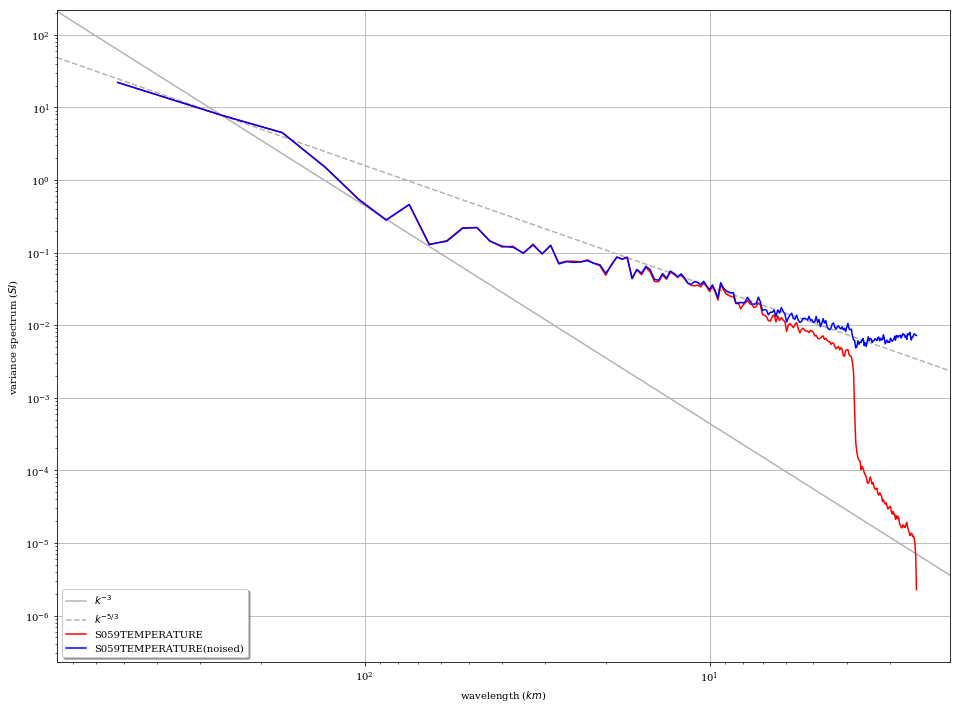

In [5]:
# and plot
fig, ax = epygram.spectra.plotspectra([sp59, sp59n])